### Sarvayga Singh
#### 60009200030 - K1
#### IPCV - lab6
#### Histogram Equalisation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
img_size = (300,300)
img = [[0 for i in range(img_size[0])] for j in range(img_size[1])]
print(np.shape(img))

(300, 300)


In [3]:
total = img_size[0]*img_size[1]
count = 0
for i in range(img_size[0]):
  for j in range(img_size[1]):
    img[i][j] = count*(255/total)
    count += 1

img = np.array(img)

In [4]:
imgX = np.reshape(img,-1)
imgX

array([0.00000000e+00, 2.83333333e-03, 5.66666667e-03, ...,
       2.54991500e+02, 2.54994333e+02, 2.54997167e+02])

In [5]:
np.shape(imgX)

(90000,)

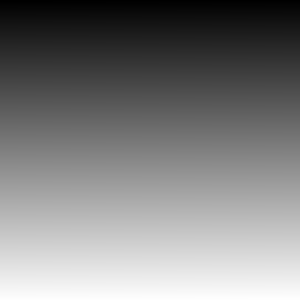

In [6]:
cv2_imshow(img)

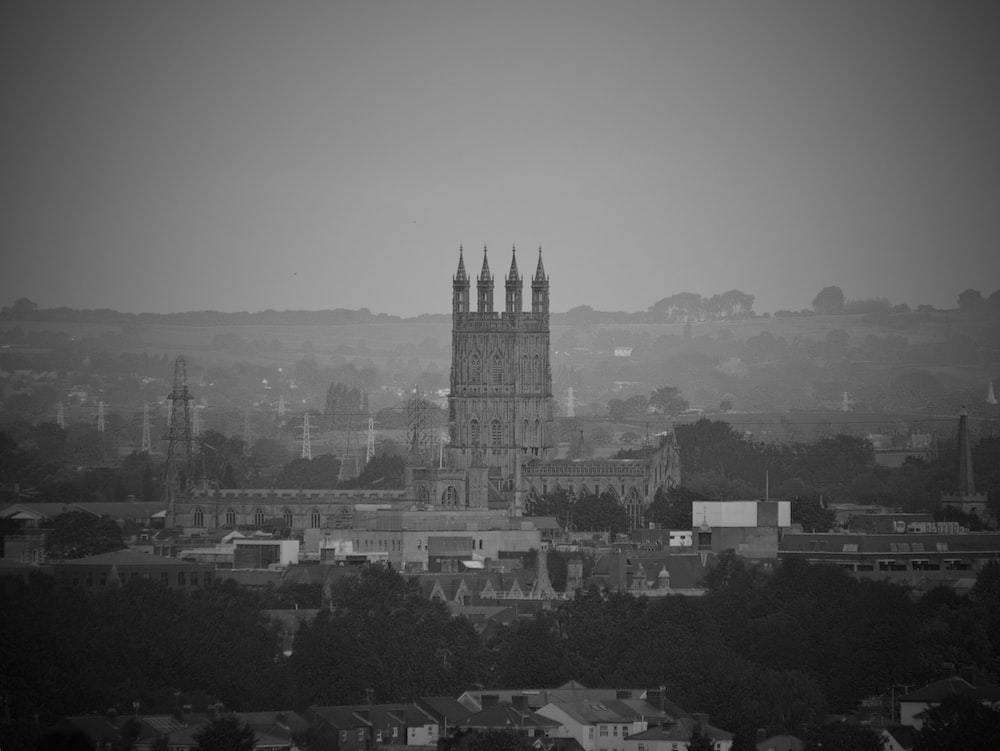

In [7]:
img = cv2.imread('/content/imager.jpeg',0)
# plt.imshow(img);
cv2_imshow(img)

In [8]:
np.shape(img)

(751, 1000)

In [9]:
print(np.max(img),np.min(img))

193 0


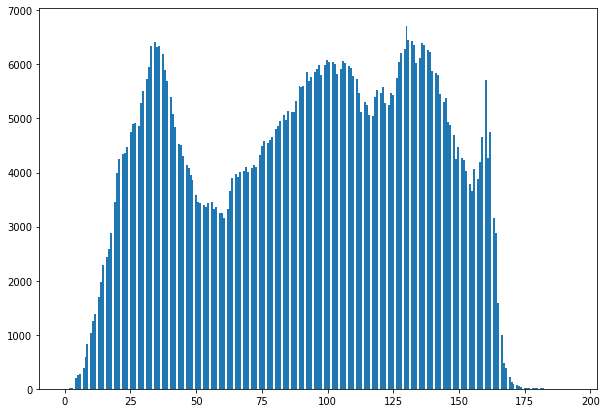

In [10]:
imgX = np.reshape(img,-1)
plt.figure(figsize=(10,7))    	        
plt.hist(imgX, bins=256);

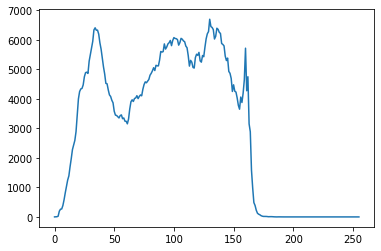

In [11]:
hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist1);

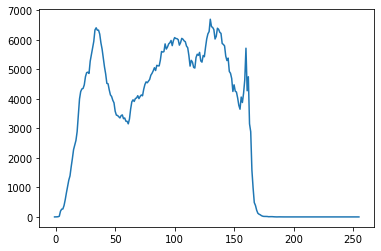

In [18]:
def create_Dist(img):
  indexer = {}
  for i,value1 in enumerate(img):
    for j,value2 in enumerate(value1):
      if value2 not in indexer:
        indexer[value2] = 1
      else:
        indexer[value2] += 1
  indexer[-1] = 0
  for i in range(256):
    try:
      indexer[i] = indexer[i]*1
      pass
    except:
      indexer[i] = 0

  lister = sorted(list(indexer.keys()))
  final = {i:indexer[i] for i in lister}
  return final
Dict_values = create_Dist(img)
plt.plot(list(Dict_values.keys()),list(Dict_values.values()));

In [ ]:
Dict_values.keys()

In [57]:
def stepper(num):
  num_list = str(num).split('.')
  if num_list[1][0]>='5':
    return int(num_list[0])+1
  else:
    return int(num_list[0])
# stepper(0.600340878828229028)

In [97]:
def Hist_equalizer(Dict_values):
  sum = 0
  cdf = {}
  # pdf_list = [0]
  for i in Dict_values.keys():
    sum += Dict_values[i]

  pdf = {i:(Dict_values[i]/sum) for i in Dict_values.keys()}
  pdf_list = list(pdf.values())
  cdf[-1] = 0
  # cdf = {i:(pdf_list[i]+cdf[i-1]) for i in range(5)} This wont work as this is dict comprehension as it does all of the computing at once so it does stores the values
  for i in range(256):
    cdf[i] = pdf_list[i]+cdf[i-1]
  fcdf = {i:cdf[i]*256 for i in range(256)}
  hist_equalizer = map(lambda x: stepper(x), list(fcdf.values()))
  return hist_equalizer

Hist_equi = list(Hist_equalizer(Dict_values))

In [99]:
len(Hist_equi)

256

In [ ]:
finalx = {}
pixels = list(Dict_values.values())
for index,i in enumerate(Hist_equi):
  if i not in finalx.keys():
    finalx[i] = pixels[index+1]
  else:
    finalx[i] += pixels[index+1]

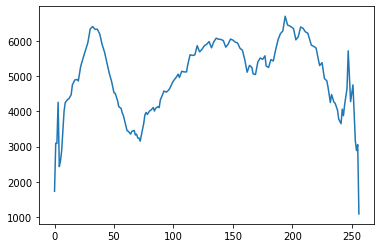

In [102]:
plt.plot(list(finalx.keys()),list(finalx.values()));

#### So as we can see now the contrast has been quite significantly in comparison to that of the original image

In [ ]:
# img_2 = cv2.equalizeHist(img)
# cv2_imshow(img_2)

# hist2 = cv2.calcHist([img_2],[0],None,[256],[0,256])
# plt.plot(hist2);

In [ ]:
!jupyter nbconvert --to html ''